In [1]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
import pickle
import matplotlib.patches as mpatches

In [2]:
# Load the serialized linear regression results that are created by the radiometric image calibration file

with open("../WhiteImages/linearized_R.pickle") as file:
    linearized_R = pickle.load(file)
with open("../WhiteImages/linearized_G.pickle") as file:
    linearized_G = pickle.load(file)
with open("../WhiteImages/linearized_B.pickle") as file:
    linearized_B = pickle.load(file)

In [3]:
# Read the selected images for the HDR stack, put into a list

img_a0 = cv.imread('IMG_0027-1by640sec-100ISO.JPG') # Exposed to the right at T = 1/640
img_a1 = cv.imread('IMG_0034-1by125sec-100ISO.JPG') # Exposed at a1 * T = 1/125
img_a2 = cv.imread('IMG_0037-1by60sec-100ISO.JPG') # Exposed at a2 * T= 1/60
img_list = [img_a0, img_a1, img_a2]

In [43]:
# Split each image into it's channels
# Raise each channel to it's corresponding g value
# Convert to float32
# Create a list of all channels where each element is a 3 tuple of channels
linearized_channels = []
for img in img_list:
    
    img_copy = img.copy()
    img_b_linearized, img_g_linearized, img_r_linearized = cv.split(img_copy)
    img_b_linearized = np.float32(img_b_linearized)
    img_g_linearized = np.float32(img_g_linearized)
    img_r_linearized = np.float32(img_r_linearized)

    b_g = np.float32((1./linearized_B.slope))
    g_g = np.float32((1./linearized_G.slope))
    r_g = np.float32((1./linearized_R.slope))

  
    img_b_linearized = np.power(img_b_linearized, b_g)
    img_g_linearized = np.power(img_g_linearized, g_g)
    img_r_linearized = np.power(img_r_linearized, r_g)

    linearized_channels.append((img_b_linearized, img_g_linearized, img_r_linearized))
    


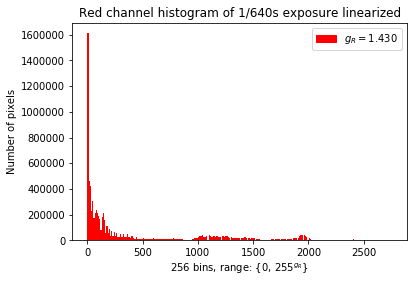

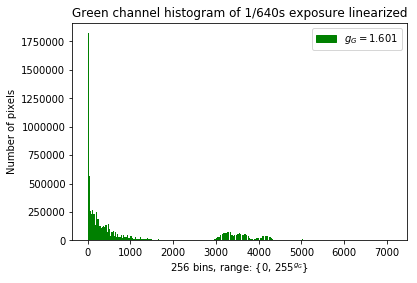

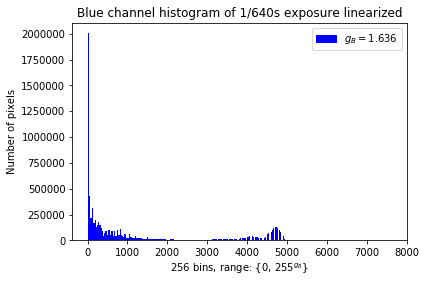

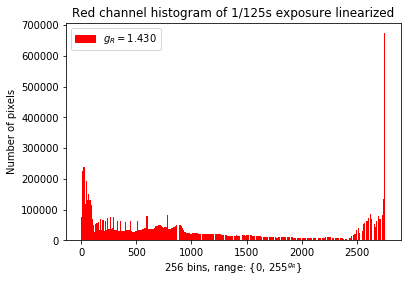

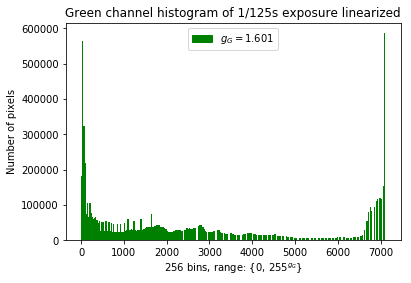

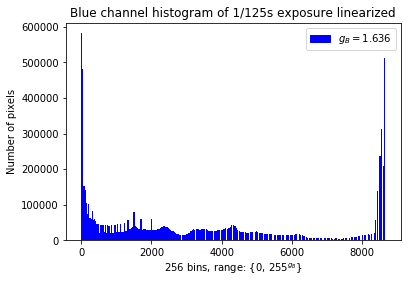

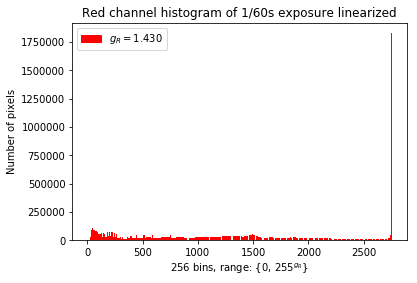

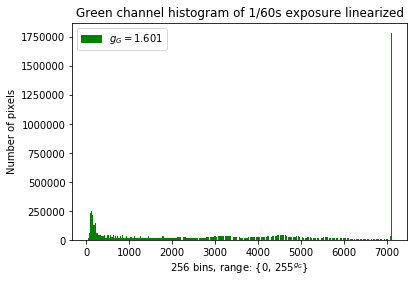

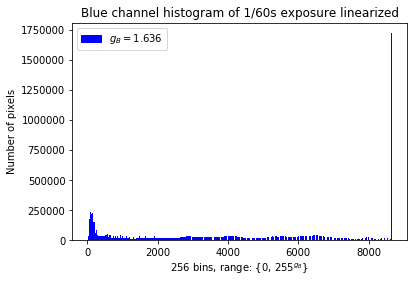

In [54]:
# Plot histograms of each channel's linearized B(T) of each image.

exposure_names = ["1/640", "1/125", "1/60"]
exposure_values = [1./640, 1./125, 1./60]


for linearized_img, exposure_name, a_name in zip(linearized_channels, exposure_names, ["a0", "a1", "a2"]):
    r_channel = linearized_img[2]
    plt.hist(r_channel.ravel(), bins=256, range=None, color='red')
    r_g_legend = mpatches.Patch(color='red', label='$g_R = {0:.3f}$'.format(r_g))
    plt.legend(handles=[r_g_legend])
    plt.title("Red channel histogram of {0}s exposure linearized".format(exposure_name))
    plt.xlabel("256 bins, range: {0, $255^{g_R}$}")
    plt.ylabel("Number of pixels")
#     plt.savefig("Red histogram Bg({0}T).JPG".format(a_name), dpi=200, bbox_inches="tight")
    plt.show()
    
    g_channel = linearized_img[1]
    plt.hist(g_channel.ravel(), bins=256, range=None, color='green')
    g_g_legend = mpatches.Patch(color='green', label='$g_G = {0:.3f}$'.format(g_g))
    plt.legend(handles=[g_g_legend])
    plt.title("Green channel histogram of {0}s exposure linearized".format(exposure_name))
    plt.xlabel("256 bins, range: {0, $255^{g_G}$}")
    plt.ylabel("Number of pixels")
#     plt.savefig("Green histogram Bg({0}T).JPG".format(a_name), dpi=200, bbox_inches="tight")
    plt.show()
    
    b_channel = linearized_img[0]
    plt.hist(b_channel.ravel(), bins=256, range=None, color='blue')
    b_g_legend = mpatches.Patch(color='blue', label='$g_B = {0:.3f}$'.format(b_g))
    plt.legend(handles=[b_g_legend])
    plt.title("Blue channel histogram of {0}s exposure linearized".format(exposure_name))
    plt.xlabel("256 bins, range: {0, $255^{g_B}$}")
    plt.ylabel("Number of pixels")
#     plt.savefig("Blue histogram Bg({0}T).JPG".format(a_name), dpi=200, bbox_inches="tight")
    plt.show()


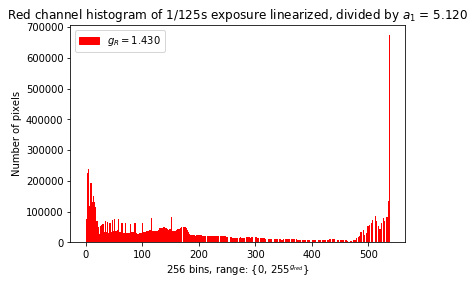

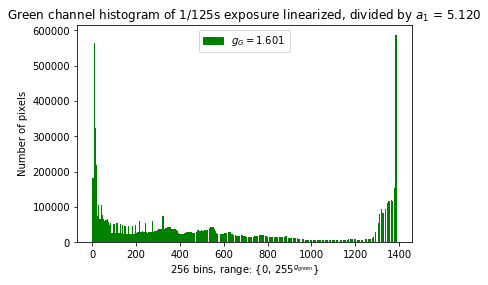

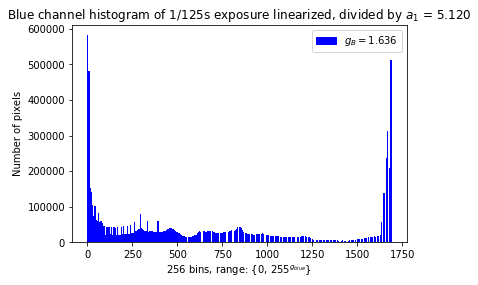

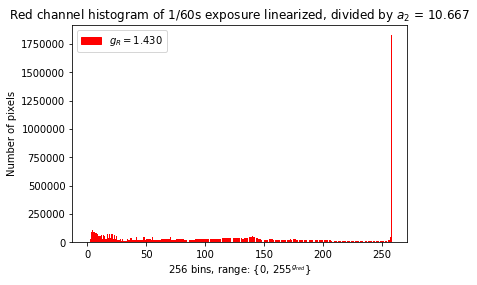

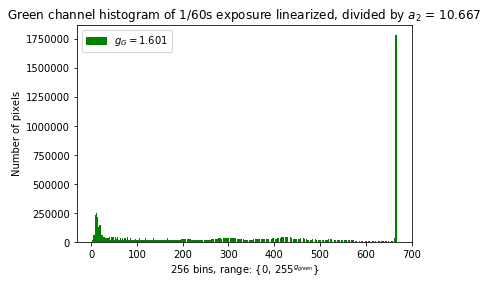

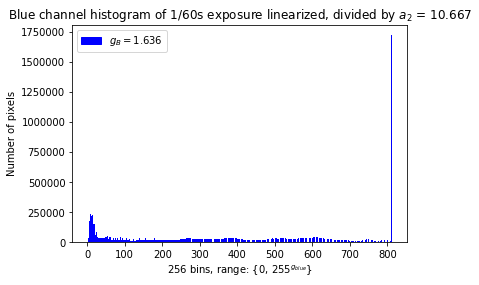

In [55]:
# Plot histograms of each channel's linearized B(T) of images 2 and 3, after dividing by the corresponding a value

a_values = (np.float32(exposure_values[1]/exposure_values[0]), np.float32(exposure_values[2]/exposure_values[0]))

trunc_exposure_names = list(exposure_names)
trunc_exposure_names.pop(0)

trunc_linearized = list(linearized_channels)
trunc_linearized.pop(0)

trunc_img_list = list(img_list)
trunc_img_list.pop(0)
    


for linearized_img, a_value, exposure, a_name, a_file in zip(trunc_linearized, a_values, trunc_exposure_names, ["$a_1$", "$a_2$"], ["a1", "a2"]):
    r_channel = linearized_img[2]/a_value
    plt.hist(r_channel.ravel(), bins=256, range=None, color='red')
    r_g_legend = mpatches.Patch(color='red', label='$g_R = {0:.3f}$'.format(r_g))
    plt.legend(handles=[r_g_legend])
    plt.title("Red channel histogram of {0}s exposure linearized, divided by {1} = {2:.3f}".format(exposure, a_name, a_value))
    plt.xlabel("256 bins, range: {0, $255^{g_{red}}$}")
    plt.ylabel("Number of pixels")
#     plt.savefig("Red histogram Bg({0}T) by {0}.JPG".format(a_file), dpi=200, bbox_inches="tight")
    plt.show()
    
    g_channel = linearized_img[1]/a_value
    plt.hist(g_channel.ravel(), bins=256, range=None, color='green')
    g_g_legend = mpatches.Patch(color='green', label='$g_G = {0:.3f}$'.format(g_g))
    plt.legend(handles=[g_g_legend])
    plt.title("Green channel histogram of {0}s exposure linearized, divided by {1} = {2:.3f}".format(exposure, a_name, a_value))
    plt.xlabel("256 bins, range: {0, $255^{g_{green}}$}")
    plt.ylabel("Number of pixels")
#     plt.savefig("Green histogram Bg({0}T) by {0}.JPG".format(a_file), dpi=200, bbox_inches="tight")
    plt.show()
    
    b_channel = linearized_img[0]/a_value
    plt.hist(b_channel.ravel(), bins=256, range=None, color='blue')
    b_g_legend = mpatches.Patch(color='blue', label='$g_B = {0:.3f}$'.format(b_g))
    plt.legend(handles=[b_g_legend])
    plt.title("Blue channel histogram of {0}s exposure linearized, divided by {1} = {2:.3f}".format(exposure, a_name, a_value))
    plt.xlabel("256 bins, range: {0, $255^{g_{blue}}$}")
    plt.ylabel("Number of pixels")
#     plt.savefig("Blue histogram Bg({0}T) by {0}.JPG".format(a_file), dpi=200, bbox_inches="tight")
    plt.show()
    

In [18]:
# Merge the channels back into images, accounting for division by a values for images 2 and 3

a_1, a_2 = a_values
img_lin_a0 = cv.merge((linearized_channels[0][0], linearized_channels[0][1], linearized_channels[0][2]))
img_lin_a1 = cv.merge((linearized_channels[1][0]/( a_1 ), linearized_channels[1][1]/( a_1 ), linearized_channels[1][2]/( a_1 )))
img_lin_a2 = cv.merge((linearized_channels[2][0]/( a_2 ), linearized_channels[2][1]/( a_2 ), linearized_channels[2][2]/( a_2 )))

In [19]:
## ALGORITHM 1

print("Running HDR algorithm 1, this may take a few minutes...")

# Copy image 3 (linearized and time corrected)
hdr1_lin_img = img_lin_a2.copy()

# For each pixel in image 3, if any channel saturated, copy entire pixel from image 2 (linearized and time corrected)
for x, row in enumerate(img_a2):
    for y, pixel in enumerate(row):
        #print(x,y)
        if 255 in pixel:
            hdr1_lin_img[x][y] = img_lin_a1[x][y]
            
               
# For each pixel composite generated above, if any channel still saturated, copy entire pixel from image 1 (linearized)
for x, row in enumerate(img_a1):
    for y, pixel in enumerate(row):
        #print(x,y)
        if 255 in pixel:
            hdr1_lin_img[x][y] = img_lin_a0[x][y]

print("Done with HDR algorithm 1")

In [20]:
## ALGORITHM 2

print("Running HDR algorithm 2, this may take a few minutes...")

# Copy image 3 (linearized and time corrected)
hdr2_lin_img = img_lin_a2.copy()

# For all non-saturated pixels in original images, average corresponding pixels in linearized and time corrected images
for x, row in enumerate(img_a2):
    for y, pixel_a2 in enumerate(row):
        #print(x,y)
        pixel_a1 = img_lin_a1[x][y]
        pixel_a0 = img_lin_a0[x][y]
        if 255 in pixel_a2:
            if 255 in pixel_a1:
                hdr2_lin_img[x][y] = pixel_a0
            else:
                hdr2_lin_img[x][y] = (pixel_a0+pixel_a1)/2
        else:
            hdr2_lin_img[x][y] = (pixel_a0+pixel_a1+pixel_a2)/3
            
print("Done with HDR algorithm 2")

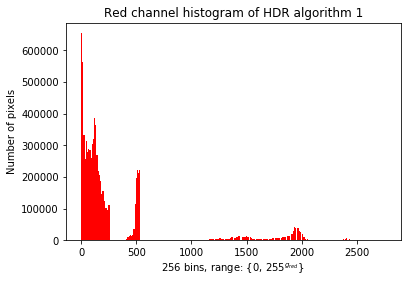

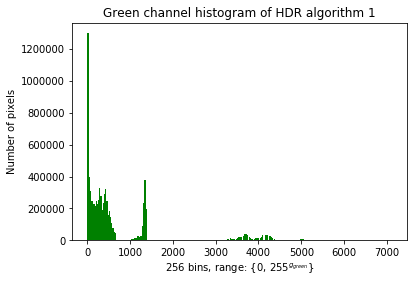

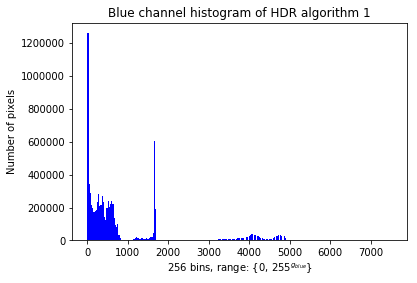

In [59]:
# Plot the histograms for each channel of the first algorithm image

(hdr1_b, hdr1_g, hdr1_r) = cv.split(hdr1_lin_img.copy())

r_channel = hdr1_r
plt.hist(r_channel.ravel(), bins=256, range=None, color='red')
plt.title("Red channel histogram of HDR algorithm 1")
plt.xlabel("256 bins, range: {0, $255^{g_{red}}$}")
plt.ylabel("Number of pixels")
# plt.savefig("Red histogram HDR1.JPG", dpi=200, bbox_inches="tight")
plt.show()

g_channel = hdr1_g
plt.hist(g_channel.ravel(), bins=256, range=None, color='green')
plt.title("Green channel histogram of HDR algorithm 1")
plt.xlabel("256 bins, range: {0, $255^{g_{green}}$}")
plt.ylabel("Number of pixels")
# plt.savefig("Green histogram HDR1.JPG", dpi=200, bbox_inches="tight")
plt.show()

b_channel = hdr1_b
plt.hist(b_channel.ravel(), bins=256, range=None, color='blue')
plt.title("Blue channel histogram of HDR algorithm 1")
plt.xlabel("256 bins, range: {0, $255^{g_{blue}}$}")
plt.ylabel("Number of pixels")
# plt.savefig("Blue histogram HDR1.JPG", dpi=200, bbox_inches="tight")
plt.show()

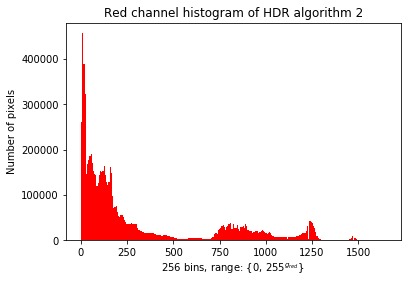

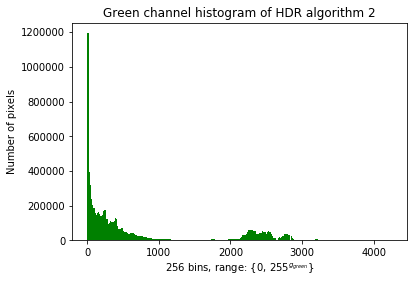

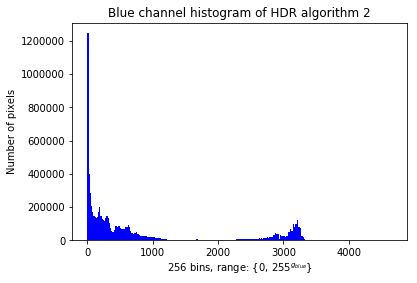

In [60]:
# Plot the histograms for each channel of the second algorithm image

(hdr2_b, hdr2_g, hdr2_r) = cv.split(hdr2_lin_img.copy())

r_channel = hdr2_r
plt.hist(r_channel.ravel(), bins=256, range=None, color='red')
plt.title("Red channel histogram of HDR algorithm 2")
plt.xlabel("256 bins, range: {0, $255^{g_{red}}$}")
plt.ylabel("Number of pixels")
# plt.savefig("Red histogram HDR2.JPG", dpi=200, bbox_inches="tight")
plt.show()

g_channel = hdr2_g
plt.hist(g_channel.ravel(), bins=256, range=None, color='green')
plt.title("Green channel histogram of HDR algorithm 2")
plt.xlabel("256 bins, range: {0, $255^{g_{green}}$}")
plt.ylabel("Number of pixels")
# plt.savefig("Green histogram HDR2.JPG", dpi=200, bbox_inches="tight")
plt.show()

b_channel = hdr2_b
plt.hist(b_channel.ravel(), bins=256, range=None, color='blue')
plt.title("Blue channel histogram of HDR algorithm 2")
plt.xlabel("256 bins, range: {0, $255^{g_{blue}}$}")
plt.ylabel("Number of pixels")
# plt.savefig("Blue histogram HDR2.JPG", dpi=200, bbox_inches="tight")
plt.show()

In [66]:
# Function to show an image with some parameters used for testing

def show_img(img, title="", rgb=False, normalize=False):
    b,g,r = cv.split(img)
    if normalize:
        b = b/255**b_g
        g = g/255**g_g
        r = r/255**r_g
    dst = cv.merge((b,g,r))
    if rgb:
        dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
    plt.title(title)
    plt.imshow(dst)
    plt.show()

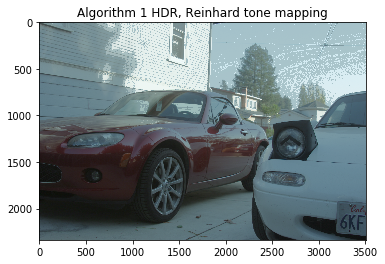

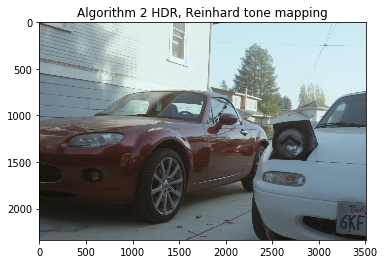

In [67]:
# Reinhard tone mapping of the resulting HDR composites
# Note, must be converted back to uint8 after tone mapping so image displays and saves properly

tonemapReinhard1 = cv.createTonemapReinhard(2, 1, 0, 1)
ldrReinhard1 = tonemapReinhard1.process(hdr1_lin_img.copy())
tonemapReinhard2 = cv.createTonemapReinhard(2, 1, 0, 1)
ldrReinhard2 = tonemapReinhard2.process(hdr2_lin_img.copy())

show_img((255*ldrReinhard1).astype(np.uint8), title="Algorithm 1 HDR, Reinhard tone mapping", rgb=True)
show_img((255*ldrReinhard2).astype(np.uint8), title="Algorithm 2 HDR, Reinhard tone mapping", rgb=True)

# cv.imwrite("HDR1 Tonemapped.JPG", (255*ldrReinhard1))
# cv.imwrite("HDR2 Tonemapped.JPG", (255*ldrReinhard2))
